<a href="https://colab.research.google.com/github/mazimum86/Neural-Networks/blob/main/Introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we6've modified it to only use two classes (pizza 🍕 & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> &#x1F511; **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-07 09:23:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 209.85.200.207, 209.85.234.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   197MB/s    in 0.5s    

2023-12-07 09:23:06 (197 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# The extra file in our pizza_steak directory is ". DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec  7 09:23 .
drwxr-xr-x 1 root root 4096 Dec  7 09:23 ..
drwxr-xr-x 4 root root 4096 Dec  7 09:23 test
drwxr-xr-x 4 root root 4096 Dec  7 09:23 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first lets get the class names programmatically.

In [8]:
# Get the classnames programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories in the training folder

print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape:  {img.shape}") # show the shape of the image

  return img

['3790235.jpg']
Image shape:  (512, 384, 3)


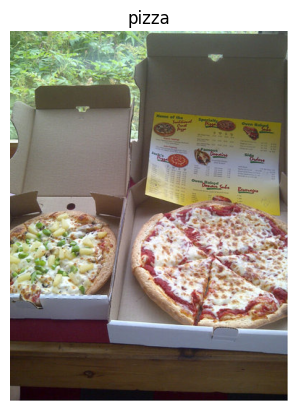

In [10]:
# View a random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[119, 140,  84],
        [122, 145,  91],
        [116, 145,  89],
        ...,
        [ 81,  87,  83],
        [ 73,  79,  75],
        [172, 181, 176]],

       [[101, 121,  68],
        [105, 130,  75],
        [104, 133,  77],
        ...,
        [ 82,  88,  84],
        [ 75,  81,  77],
        [179, 185, 181]],

       [[ 98, 121,  69],
        [112, 139,  86],
        [120, 149,  93],
        ...,
        [ 81,  87,  83],
        [ 73,  80,  73],
        [176, 183, 176]],

       ...,

       [[ 93,  82,  80],
        [ 96,  85,  83],
        [ 97,  87,  85],
        ...,
        [  4,   3,   8],
        [  2,   2,   4],
        [150, 150, 152]],

       [[ 71,  61,  62],
        [ 73,  65,  63],
        [ 73,  68,  65],
        ...,
        [  0,   0,   2],
        [  8,  10,   9],
        [132, 134, 133]],

       [[180, 169, 173],
        [182, 173, 174],
        [181, 177, 176],
        ...,
        [148, 149, 15

In [12]:
# View the image shape
img.shape  # returns width, height, colour channels

(512, 384, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img/255

array([[[0.46666667, 0.54901961, 0.32941176],
        [0.47843137, 0.56862745, 0.35686275],
        [0.45490196, 0.56862745, 0.34901961],
        ...,
        [0.31764706, 0.34117647, 0.3254902 ],
        [0.28627451, 0.30980392, 0.29411765],
        [0.6745098 , 0.70980392, 0.69019608]],

       [[0.39607843, 0.4745098 , 0.26666667],
        [0.41176471, 0.50980392, 0.29411765],
        [0.40784314, 0.52156863, 0.30196078],
        ...,
        [0.32156863, 0.34509804, 0.32941176],
        [0.29411765, 0.31764706, 0.30196078],
        [0.70196078, 0.7254902 , 0.70980392]],

       [[0.38431373, 0.4745098 , 0.27058824],
        [0.43921569, 0.54509804, 0.3372549 ],
        [0.47058824, 0.58431373, 0.36470588],
        ...,
        [0.31764706, 0.34117647, 0.3254902 ],
        [0.28627451, 0.31372549, 0.28627451],
        [0.69019608, 0.71764706, 0.69019608]],

       ...,

       [[0.36470588, 0.32156863, 0.31372549],
        [0.37647059, 0.33333333, 0.3254902 ],
        [0.38039216, 0

In [14]:
#pip install tensorflow==2.3.0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf

#from tensorflow.keras.image import ImageDataGenerator





# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"           # Same as above

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                                class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGC on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1= model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 135s 3s/step - loss: 0.6409 - accuracy: 0.6460 - val_loss: 0.5231 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 116s 2s/step - loss: 0.4595 - accuracy: 0.7833 - val_loss: 0.3559 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 124s 3s/step - loss: 0.4195 - accuracy: 0.8187 - val_loss: 0.4577 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 123s 3s/step - loss: 0.3958 - accuracy: 0.8327 - val_loss: 0.3522 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 126s 3s/step - loss: 0.3375 - accuracy: 0.8667 - val_loss: 0.3522 - val_accuracy: 0.8260


> &#x1F511;**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you are using a GPU by going to Runtime -> Change Runtime Type -> Hardware Aceelator -> GPU (you may have to rerun some cells above).

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 104s 2s/step - loss: 0.6925 - accuracy: 0.5927 - val_loss: 0.4821 - val_accuracy: 0.8060


In [16]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

&#x1F6E0; **Exercise:** Go through the CNN explainer website for a minimum of 10 mins and compare our neural network with theirs: https://poloclub.github.io/cnn-explainer/


## Using the same model as before

Let's replicate the model we've built in a previous section to see if works with our image data.

The model we're building is from the [TensorFlow playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.31543&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 210ms/step - loss: 0.6743 - accuracy: 0.5753 - val_loss: 0.6154 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6098 - accuracy: 0.7447 - val_loss: 0.5842 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5832 - accuracy: 0.7533 - val_loss: 0.5647 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.5633 - accuracy: 0.7733 - val_loss: 0.5541 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.5352 - accuracy: 0.8013 - val_loss: 0.5636 - val_accuracy: 0.7640


In [18]:
# Get a summary for model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [19]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but lets step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu" ),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 21s 402ms/step - loss: 3.5803 - accuracy: 0.6027 - val_loss: 1.0000 - val_accuracy: 0.6060
Epoch 2/5
47/47 [==============================] - 18s 373ms/step - loss: 1.0346 - accuracy: 0.7107 - val_loss: 0.5857 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 17s 362ms/step - loss: 2.0929 - accuracy: 0.6313 - val_loss: 0.6428 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 18s 390ms/step - loss: 0.6320 - accuracy: 0.7553 - val_loss: 0.5903 - val_accuracy: 0.7320
Epoch 5/5
47/47 [==============================] - 17s 367ms/step - loss: 0.5004 - accuracy: 0.7793 - val_loss: 0.4942 - val_accuracy: 0.7680


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
15000000/31000


483.8709677419355

&#x1F511;**Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we are using. Where a possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification: Lets break it down

1. Become one with the data (visualize, visualize,visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. EValuate the model
6. Adjust different parameters and improve the model(try to beat ouri baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3335267.jpg']
Image shape:  (384, 512, 3)
['898843.jpg']
Image shape:  (512, 512, 3)


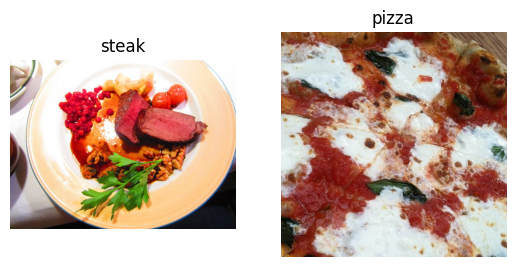

In [23]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/", 'pizza')

### 2. Preprocess the data (prepare it for our model, the main step here was scaling/normalizing & turning our data into batches)

In [24]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~ 10,000 images at a time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=en


In [25]:
# Create train and test data generators and rescale the data
train_datagen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)



In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target directory of images
                                               target_size = (224,224), # Target size of images
                                               class_mode = "binary", # type of data you're working with
                                               batch_size = 32)    # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next()  # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
1500/32

46.875

In [30]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [31]:
images[7].shape

(224, 224, 3)

In [32]:
# view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then you keep experimenting, you try to beat the baseline

 &#x1F511;**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
# Create the model (this will be ouri baseline, a layer convulational neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding windows going across the input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if same, output shape is same as input shape, if 'valid', output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)), # Input layer (specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

🛠 **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/


In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



In [36]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [37]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
           epochs=5,
            steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 135s 3s/step - loss: 0.8330 - accuracy: 0.5867 - val_loss: 0.5273 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 131s 3s/step - loss: 0.5230 - accuracy: 0.7580 - val_loss: 0.4679 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 140s 3s/step - loss: 0.4155 - accuracy: 0.8213 - val_loss: 0.5432 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 130s 3s/step - loss: 0.2730 - accuracy: 0.9200 - val_loss: 0.4254 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 140s 3s/step - loss: 0.1323 - accuracy: 0.9713 - val_loss: 0.4272 - val_accuracy: 0.8260


### 5. Evaluate our model

It looks like our model is learning something. lets evaluate it.

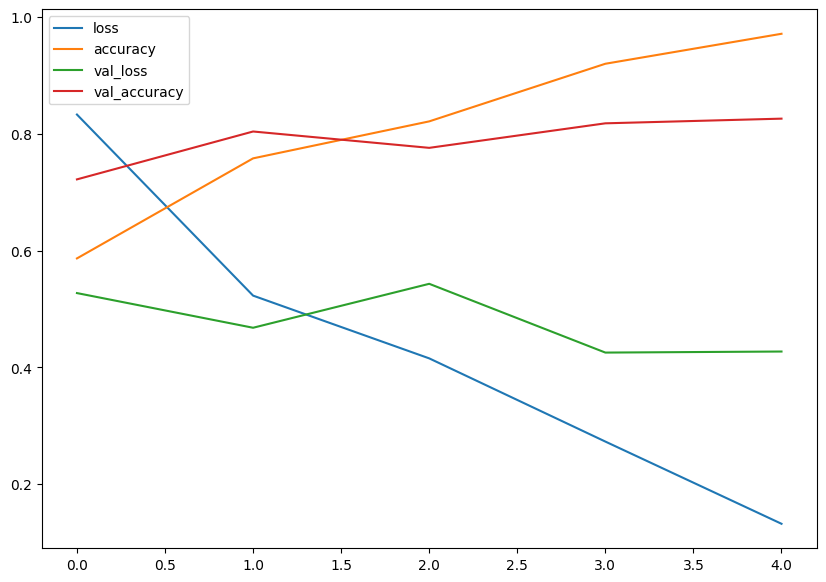

In [39]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [40]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

&#x1F511;**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

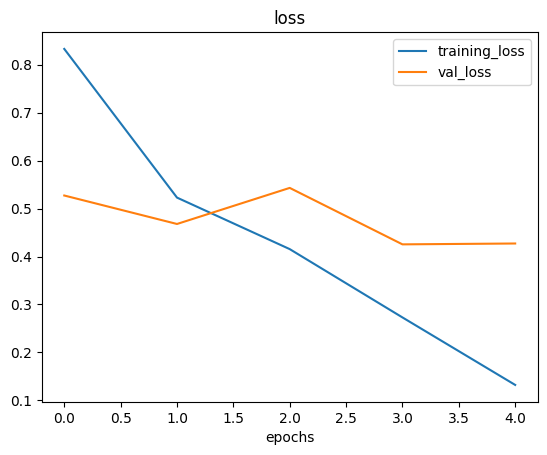

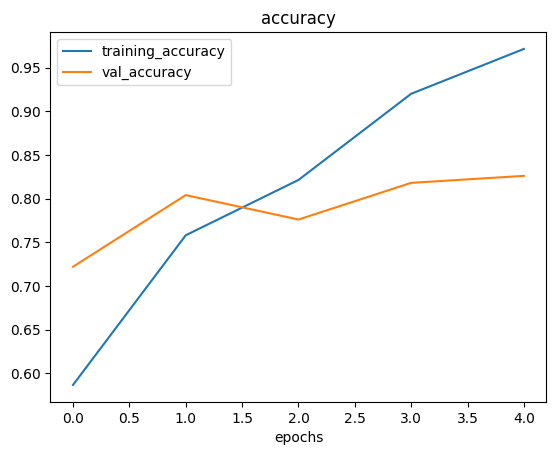

In [41]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

&#x1F511; **Note:** Ideally the two loss curves(training and validation) will be very similar to each other (decreasing at similar rates), when there are large differences your model may be **overfitting**

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of Conv layers
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

>&#x1F511; **Note:** Reducing overfitting is also known as **regularization**

In [42]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [43]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [44]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data = test_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 58s 1s/step - loss: 0.5976 - accuracy: 0.6813 - val_loss: 0.4776 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 61s 1s/step - loss: 0.4771 - accuracy: 0.7873 - val_loss: 0.4232 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 56s 1s/step - loss: 0.4253 - accuracy: 0.8207 - val_loss: 0.4364 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 61s 1s/step - loss: 0.4129 - accuracy: 0.8120 - val_loss: 0.3402 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.3642 - accuracy: 0.8513 - val_loss: 0.3065 - val_accuracy: 0.8780


In [45]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [46]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


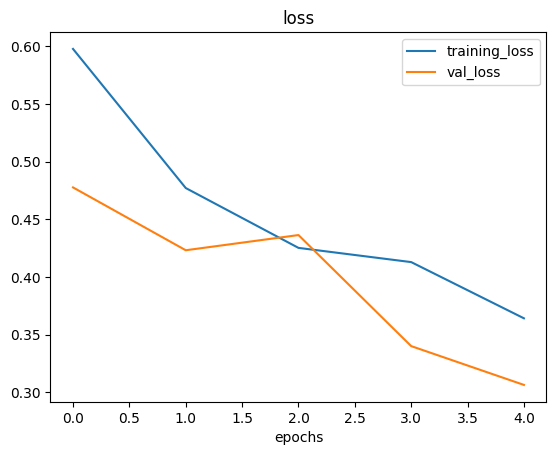

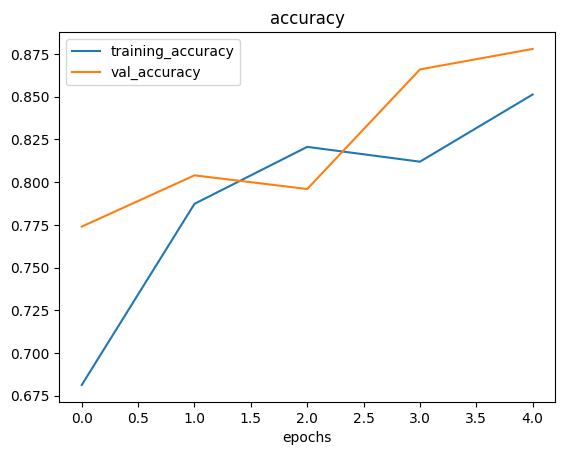

In [47]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augumentation

In [48]:
# Create ImageDataGenerator training instance with data augumentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to share an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move youir image around on the y-axis
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)



> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmeentation...

In [49]:
# Import data and augmet it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print('Non-Augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-Augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usually only performed on the training data. Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [50]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, _ = train_data_augmented.next() # note: labels aren't augmented

showing image number: 26


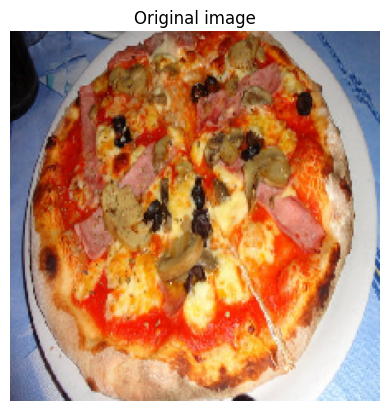

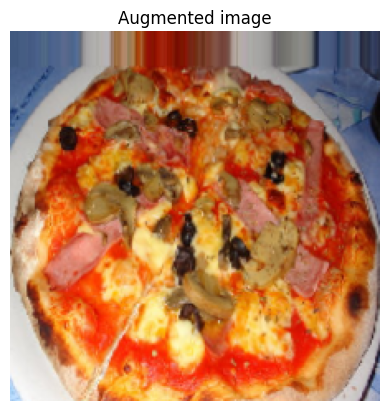

In [51]:
# Show original image and augmented image

import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Now we've seen what augmented training data looks like, lets build a model and see how it goes

In [52]:
# Create a model (same as mode_5)
model_6 = tf.keras.models.Sequential()
model_6.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu", input_shape=(224,224,3)))
model_6.add(tf.keras.layers.MaxPool2D(2))
model_6.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D())
model_6.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D())
model_6.add(tf.keras.layers.Flatten())
model_6.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 76s 2s/step - loss: 0.7434 - accuracy: 0.4280 - val_loss: 0.6839 - val_accuracy: 0.5760
Epoch 2/5
47/47 [==============================] - 78s 2s/step - loss: 0.7124 - accuracy: 0.5460 - val_loss: 0.6789 - val_accuracy: 0.5340
Epoch 3/5
47/47 [==============================] - 80s 2s/step - loss: 0.6855 - accuracy: 0.5287 - val_loss: 0.6516 - val_accuracy: 0.6460
Epoch 4/5
47/47 [==============================] - 78s 2s/step - loss: 0.6513 - accuracy: 0.6680 - val_loss: 0.5802 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 78s 2s/step - loss: 0.5981 - accuracy: 0.7100 - val_loss: 0.4883 - val_accuracy: 0.7900


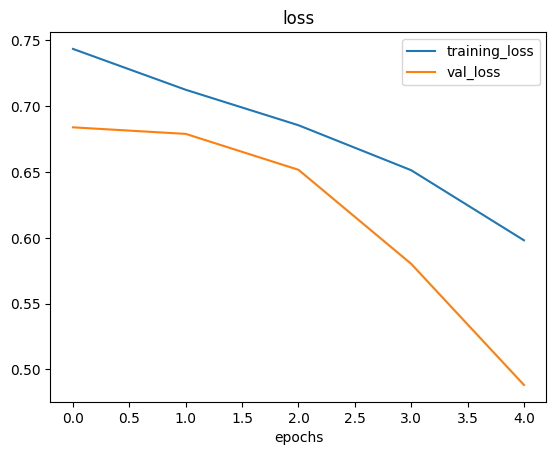

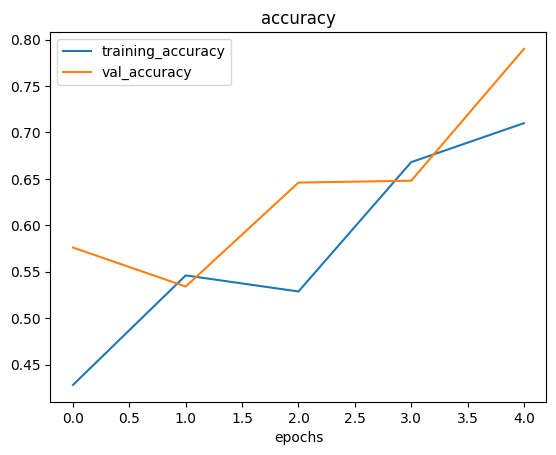

In [53]:
# Check out model training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (same as before) on it and see what happens

In [54]:
# Import data and augment and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time


Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = tf.keras.models.Sequential()
model_7.add(tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)))
model_7.add(tf.keras.layers.MaxPool2D())
model_7.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model_7.add(tf.keras.layers.MaxPool2D())
model_7.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model_7.add(tf.keras.layers.MaxPool2D())
model_7.add(tf.keras.layers.Flatten())
model_7.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented shuffled training data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data= test_data,
                        validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 80s 2s/step - loss: 0.6240 - accuracy: 0.6560 - val_loss: 0.4675 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 74s 2s/step - loss: 0.5418 - accuracy: 0.7407 - val_loss: 0.4346 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 75s 2s/step - loss: 0.5035 - accuracy: 0.7647 - val_loss: 0.3904 - val_accuracy: 0.8340
Epoch 4/5
33/47 [====================>.........] - ETA: 19s - loss: 0.4902 - accuracy: 0.7776

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more 'Conv2D'/'MaxPool2D' layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as 'model_1') and see how it performs on the augmented shuffled training data.

In [ ]:
# Set the random set
tf.random.set_seed(42)

# Build the model
model_8 = tf.keras.models.Sequential()
model_8.add(tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)))
model_8.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model_8.add(tf.keras.layers.MaxPool2D())
model_8.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model_8.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model_8.add(tf.keras.layers.MaxPool2D())
model_8.add(tf.keras.layers.Flatten())
model_8.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compile the model
model_8.compile(loss='binary_crossentropy',
                metrics = ["accuracy"],
                optimizer="adam")

# Fit the model on augmented shuffled train set
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch= len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps = len(test_data))


In [ ]:
# Plot the loss curves
plot_loss_curves(history_8)

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://static01.nyt.com/images/2023/07/14/multimedia/yk-steak-with-rof-fwgc/yk-steak-with-rof-fwgc-superJumbo.jpg

steak = mpimg.imread("yk-steak-with-rof-fwgc-superJumbo.jpg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

In [ ]:
steak

In [ ]:
tf.expand_dims(steak,axis=0)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reds an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape,color_channels).

  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Reside the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("yk-steak-with-rof-fwgc-superJumbo.jpg")
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldnt it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names

In [ ]:
class_names

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the titel.

  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "yk-steak-with-rof-fwgc-superJumbo.jpg")

Our model works! Let's try it on another image... this time pizza 🍕

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://minskys.com/wp-content/uploads/Connie-N.-300x300.jpeg

pred_and_plot(model_7, "Connie-N.-300x300.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [73]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-12-07 10:20:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.207, 172.253.114.207, 172.253.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   101MB/s    in 4.1s    

2023-12-07 10:20:10 (120 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [74]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [75]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [76]:
# Lets get the class names

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2068301.jpg']
Image shape:  (512, 512, 3)


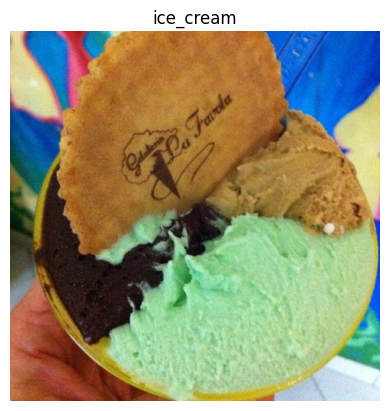

In [79]:
# Visualize, visualize, visualize

import random
img = view_random_image(target_dir=train_dir,
                        target_class = random.choice(class_names),
                        )

### 2. Preprocess the data (prepare it for a model)

In [80]:

# Rescale

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/#article-input)... how about we just take their model (also on 10 classes)  and use it for our probem...?

In [82]:
# Set Random Seed
tf.random.set_seed(42)

# 1. Build the model
model_9 = tf.keras.models.Sequential()
model_9.add(tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)))
model_9.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model_9.add(tf.keras.layers.MaxPool2D())
model_9.add(tf.keras.layers.Conv2D(10,3, activation="relu"))
model_9.add(tf.keras.layers.Conv2D(10,3,activation="relu"))
model_9.add(tf.keras.layers.MaxPool2D())
model_9.add(tf.keras.layers.Flatten())
model_9.add(tf.keras.layers.Dense(10,activation='softmax')) # change to have 10 output neurons and use the softmax

# 2. Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
# 3. Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 615s 3s/step - loss: 2.1370 - accuracy: 0.2181 - val_loss: 2.0174 - val_accuracy: 0.2752
Epoch 2/5
235/235 [==============================] - 574s 2s/step - loss: 1.8867 - accuracy: 0.3351 - val_loss: 1.9237 - val_accuracy: 0.3160
Epoch 3/5
235/235 [==============================] - 597s 3s/step - loss: 1.6104 - accuracy: 0.4483 - val_loss: 1.9451 - val_accuracy: 0.3204
Epoch 4/5
235/235 [==============================] - 561s 2s/step - loss: 1.2054 - accuracy: 0.5968 - val_loss: 2.2574 - val_accuracy: 0.3012
Epoch 5/5
235/235 [==============================] - 558s 2s/step - loss: 0.6710 - accuracy: 0.7799 - val_loss: 2.8469 - val_accuracy: 0.2876


### 5. Evaluate the model

In [83]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 56s 702ms/step - loss: 2.8469 - accuracy: 0.2876


[2.8469464778900146, 0.28760001063346863]

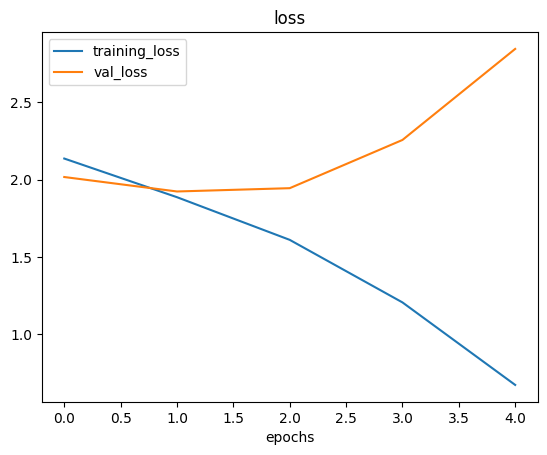

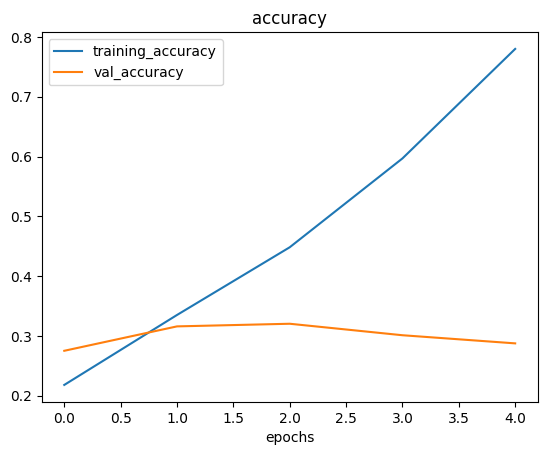

In [84]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_9)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, its getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataseet.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, its clear our model is learning something...

However, its not generalizing well to unseen data (overfitting).

So, lets try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...

* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers.

* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)

* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [87]:
# How about we try and simplify the model first?
# Lets try to remove 2 convolutional layers
model_10 = Sequential([
    Conv2D(10,3,activation="relu", input_shape= (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer='adam',
                 metrics=["accuracy"]
                 )


In [88]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 29160)             0         
                                                                 
 dense_15 (Dense)            (None, 10)              

In [89]:
# Fit our model
history_10 = model_10.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 309s 1s/step - loss: 2.0921 - accuracy: 0.2427 - val_loss: 1.9756 - val_accuracy: 0.3124
Epoch 2/5
235/235 [==============================] - 332s 1s/step - loss: 1.7354 - accuracy: 0.4112 - val_loss: 1.9359 - val_accuracy: 0.3168
Epoch 3/5
235/235 [==============================] - 416s 2s/step - loss: 1.2847 - accuracy: 0.5820 - val_loss: 1.9378 - val_accuracy: 0.3488
Epoch 4/5
235/235 [==============================] - 399s 2s/step - loss: 0.7556 - accuracy: 0.7733 - val_loss: 2.2348 - val_accuracy: 0.3328
Epoch 5/5
235/235 [==============================] - 365s 2s/step - loss: 0.3634 - accuracy: 0.9099 - val_loss: 2.8585 - val_accuracy: 0.2988


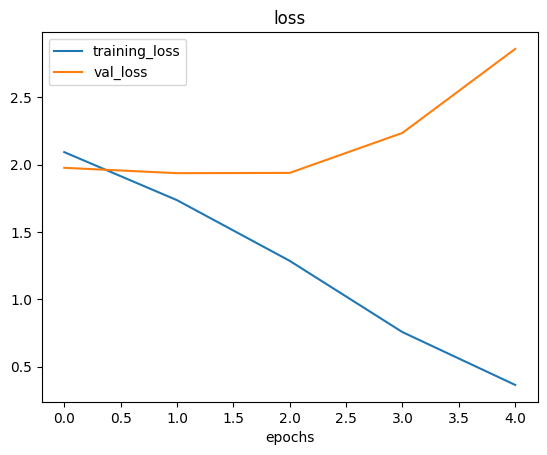

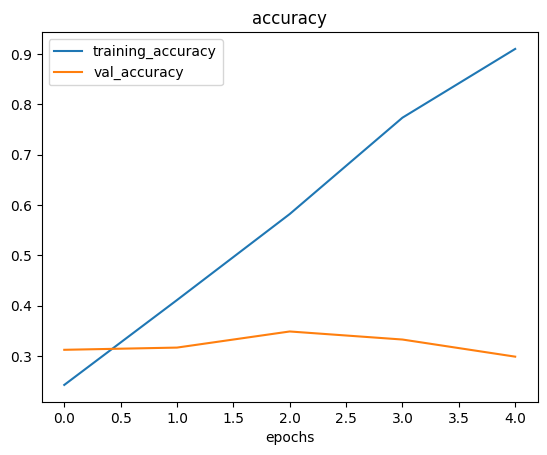

In [90]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [91]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [92]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 29160)             0         
                                                                 
 dense_15 (Dense)            (None, 10)              

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation ???


### Trying to reduce overfitting with data augmentation

Let's try and improve our model's result by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [94]:
# Create an augmented data generator instance
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                                vertical_flip=True,
                                                                zoom_range=.2,
                                                                shear_range=.2,
                                                                width_shift_range=.2,
                                                                rotation_range=.2,
                                                                height_shift_range=.2,
                                                                rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Applying on augmentation on our dataset
train_data_augmented_ = train_datagen.flow_from_directory(train_dir,
                                                        batch_size=32,
                                                          target_size=(224,224),
                                                          class_mode="categorical")
test_data_augmented_ = test_datagen.flow_from_directory(test_dir,
                                                        batch_size=32,
                                                        target_size=(224,224),
                                                        class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [97]:
# Build Model for Augmented Data

model_11 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_11.compile(loss="categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer="adam")

In [99]:
# Fit the model
history_11 = model_11.fit(train_data_augmented_,
             epochs=5,
             validation_data= test_data_augmented_,
             validation_steps=len(test_data_augmented_),
             steps_per_epoch =len(train_data_augmented_))

Epoch 1/5
235/235 [==============================] - 461s 2s/step - loss: 2.0838 - accuracy: 0.2588 - val_loss: 1.9542 - val_accuracy: 0.3172
Epoch 2/5
235/235 [==============================] - 429s 2s/step - loss: 2.0597 - accuracy: 0.2759 - val_loss: 1.9491 - val_accuracy: 0.3108
Epoch 3/5
235/235 [==============================] - 439s 2s/step - loss: 2.0297 - accuracy: 0.2887 - val_loss: 1.9212 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 424s 2s/step - loss: 1.9997 - accuracy: 0.3017 - val_loss: 1.9345 - val_accuracy: 0.3252
Epoch 5/5
235/235 [==============================] - 360s 2s/step - loss: 2.0037 - accuracy: 0.2981 - val_loss: 1.8852 - val_accuracy: 0.3636


In [100]:
model_11.evaluate(test_data)


79/79 [==============================] - 31s 386ms/step - loss: 1.8852 - accuracy: 0.3636


[1.885205864906311, 0.3635999858379364]

In [101]:
model_10.evaluate(test_data)

79/79 [==============================] - 34s 425ms/step - loss: 2.8585 - accuracy: 0.2988


[2.8585197925567627, 0.298799991607666]

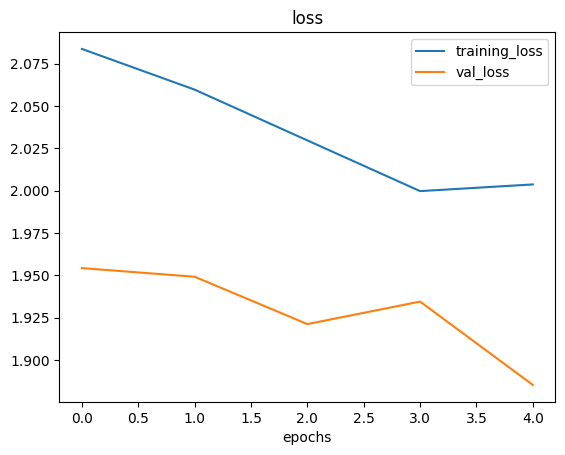

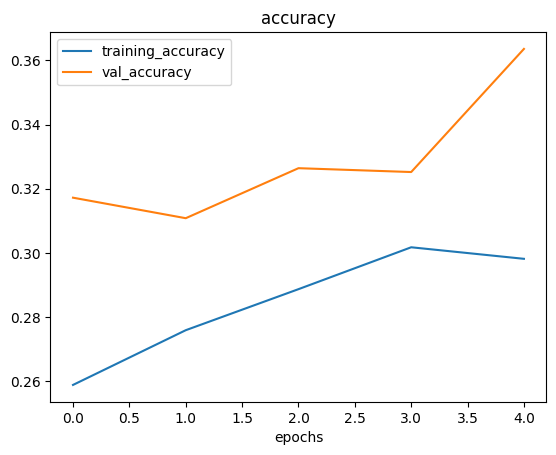

In [102]:
# Check out our model trained on augmented data loss curves
plot_loss_curves(history_11)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they are heading in the right direction (certainly not the wrong direction) so if we are to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model6's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- **try transfer learning**

In [103]:
# Lets create another model but this time we'll fit it on the augmented train data
model_12 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using the same setup as previous models)
model_12.compile(loss="categorical_crossentropy",
                 optimizer = "adam",
                 metrics = ["accuracy"])

In [104]:
model_12.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [105]:
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 29160)             0         
                                                                 
 dense_18 (Dense)            (None, 10)              

In [ ]:
# Fit the model
history_12 = model_12.fit(train_data_augmented_,
                          epochs = 5,
                          steps_per_epoch=(len(train_data_augmented_)),
                          validation_data = test_data_augmented_,
                          validation_steps = len(test_data_augmented_))

### Making a prediction with our trained models

Lets use our trained model to make some predictions on our own custom images!

In [106]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [107]:
# Download some custome images
!wget https://metrophiladelphia.com/wp-content/uploads/2017/04/pizza_dads_chef_copy-1200x725.jpg # Pizza
!wget https://i2.wp.com/www.downshiftology.com/wp-content/uploads/2023/02/Filet-Mignon.jpg # steak
!wget https://insanelygoodrecipes.com/wp-content/uploads/2020/10/Hamburger-with-Fresh-Vegetables-683x1024.webp # Hamburger
!wget https://www.thespruceeats.com/thmb/UbK1PHX6-T7GcgOqyvGK5j9IwvA=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/slow-cooker-hamburgers-recipe-for-kids-2098104-hero-01-3dd9bf2b2ca748358047f2ff4e73b64c.jpg
!wget https://urbanblisslife.com/wp-content/uploads/2020/01/Air-Fryer-Chicken-Wings-Closeup-Single.jpg # chicken wings


--2023-12-07 14:04:49--  https://metrophiladelphia.com/wp-content/uploads/2017/04/pizza_dads_chef_copy-1200x725.jpg
Resolving metrophiladelphia.com (metrophiladelphia.com)... 172.67.73.82, 104.26.14.3, 104.26.15.3, ...
Connecting to metrophiladelphia.com (metrophiladelphia.com)|172.67.73.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112104 (109K) [image/jpeg]
Saving to: ‘pizza_dads_chef_copy-1200x725.jpg’

pizza_dads_chef_cop 100%[===================>] 109.48K  --.-KB/s    in 0.02s   

2023-12-07 14:04:50 (4.43 MB/s) - ‘pizza_dads_chef_copy-1200x725.jpg’ saved [112104/112104]

--2023-12-07 14:04:50--  https://i2.wp.com/www.downshiftology.com/wp-content/uploads/2023/02/Filet-Mignon.jpg
Resolving i2.wp.com (i2.wp.com)... 192.0.77.2
Connecting to i2.wp.com (i2.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178944 (175K) [image/jpeg]
Saving to: ‘Filet-Mignon.jpg’

Filet-Mignon.jpg    100%[===================>] 174

In [117]:
# Reconfigure the pred_and_plot funciton to work with multi-class images

def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the titel.

  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Add in logic for multi-class
  if len(pred[0])>1:

    pred_class = class_names[tf.argmax(pred[0])]
  else:

    pred_class = class_names[int(tf.round(pred))]



  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 59ms/step


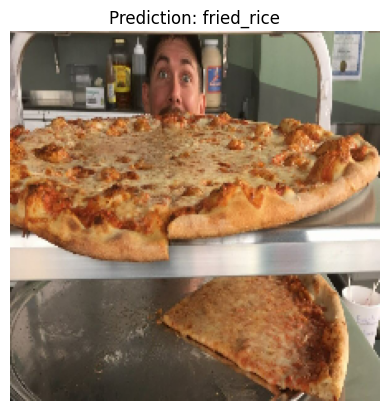

In [122]:
# Make a prediction using model_11
pred_and_plot(model= model_11,
              filename = 'pizza_dads_chef_copy-1200x725.jpg',
              class_names = class_names)

Looks like ouir model didnt perform very well on our custom images but this is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

1/1 [==============================] - 0s 135ms/step


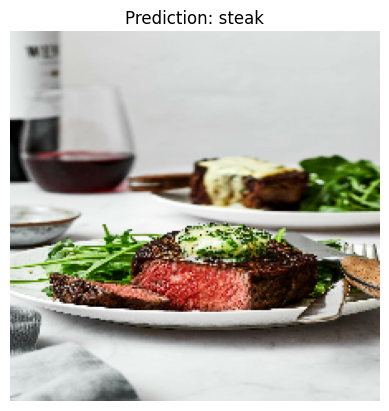

In [123]:
# Good news: our updated pred_and_plot function works for binary classification too...
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename ="Filet-Mignon.jpg",
              class_names =["pizza","steak"])

## Saving and loading our model

In [124]:
# Save a model
model_11.save("saved_trained_model_11")

In [126]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 49s 596ms/step - loss: 1.8852 - accuracy: 0.3636


[1.8852055072784424, 0.3635999858379364]

In [127]:
# Compare our loaded model to our existing model
model_11.evaluate(test_data)

79/79 [==============================] - 32s 403ms/step - loss: 1.8852 - accuracy: 0.3636


[1.885205864906311, 0.3635999858379364]